# Hypergeometric Distribution

https://www.youtube.com/watch?v=upVJ4YqTlC4&list=PLTNMv857s9WVzutwxaMb0YZKW7hoveGLS&index=5

In [1]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import seaborn as sb

import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Quick Rundown:
- discrete distribution
- equivalent to the binomial distribution, but without replacement
- the probability of success changes with each draw
- defined for 3 parameters; N, A, and n:
    - N - total population size
    - A - total items of interest in population
    - n - sample size

### Probability Mass Function (PMF):

### $$P(X=x)=\frac{C_x^{A}C_{n-x}^{N-A}}{C_n^{N}}$$

where:

#### $$C_x^n=\frac{n!}{x!(n-x)!}$$

### Expected Value:

### $$E(X)=n\frac{A}{N}$$

### Variance:

### $$V(X)=n\frac{A}{N}\frac{N-A}{N}\frac{N-n}{N-1}$$

### example 1:

let's visualize hypergeometric distribution of number of spades in a 5-card poker hand

In [3]:
from scipy.special import comb  # just combinations function

In [4]:
N = 52  # total number of cards in a deck
A = 13  # total number of spades in a deck
n = 5  # number of slots in a hand

here we have probability of having 2 spades in a hand:

In [5]:
x = 2
(comb(A, x) * comb(N-A, n-x)) / comb(N, n)

0.2742797118847539

or we can use built-in __probability mass function (PMF)__:

In [6]:
hypergeom(M=N, n=A, N=n).pmf(2)

0.27427971188475375

let's calculate probabilities of all possible variations:

In [7]:
probabilities_of_spades_in_5_card_hand =\
    [(comb(A, x) * comb(N-A, n-x)) / comb(N, n) for x in [0, 1, 2, 3, 4, 5]]
probabilities_of_spades_in_5_card_hand

[0.22153361344537814,
 0.41141956782713085,
 0.2742797118847539,
 0.08154261704681873,
 0.010729291716686675,
 0.0004951980792316927]

or we can use built-in PMF function:

In [8]:
probabilities_of_spades_in_5_card_hand = hypergeom(M=N, n=A, N=n).pmf([0, 1, 2, 3, 4, 5])
probabilities_of_spades_in_5_card_hand

array([0.22153361, 0.41141957, 0.27427971, 0.08154262, 0.01072929,
       0.0004952 ])

### let's visualize the hypergeometric distribution of those probabilities:

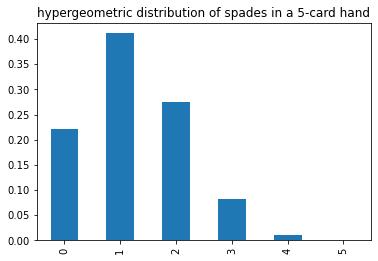

In [9]:
hypergeometric_distribution_of_cards = pd.Series(probabilities_of_spades_in_5_card_hand, index=[0, 1, 2, 3, 4, 5])

hypergeometric_distribution_of_cards.plot(kind="bar")
plt.title('hypergeometric distribution of spades in a 5-card hand')
plt.show()

let's calculate of having from 0 to 2 spades in a hand:

In [10]:
hypergeom(M=N, n=A, N=n).pmf(0) + hypergeom(M=N, n=A, N=n).pmf(1) + hypergeom(M=N, n=A, N=n).pmf(2)

0.9072328931572632

or we can use built-in __cumulative distribution function (CDF)__:

In [11]:
hypergeom(M=N, n=A, N=n).cdf(2)

0.9072328931572632

### example 2:

John is playing Texas Holdem and he has 2 diamonds in his hand. What is the probability that he scores a "flush"?

John needs at least 3 more diamonds from the five common cards.

In [12]:
N = 50  # total number of cards in a deck - 2 he already has
A = 11  # total number of diamonds in a deck - 2 he already has
n = 5  # number of slots in a hand
x = [3, 4, 5]  # required amout of diamonds from the five common cards

let's get the probabilities of having 3, 4 and 5 diamonds from the five common cards:

In [13]:
hypergeom(M=N, n=A, N=n).pmf(x)

array([0.05770592, 0.00607431, 0.00021805])

their sum will be the probability that he scores a "flush":

In [14]:
sum(hypergeom(M=N, n=A, N=n).pmf(x))

0.06399828201400831

or we can find cumulative probability of having 2 and less diamonds in a hand and subtract it from 1:

In [15]:
1 - hypergeom(M=N, n=A, N=n).cdf(2)

0.06399828201400604

or we can use survival function:

In [16]:
hypergeom(M=N, n=A, N=n).sf(2)

0.06399828201400831

#### BUT! John may get a "flush" if all the five common cards are of the same suit!!!

In [17]:
N = 50  # total number of cards in a deck - 2 he already has
A = 13  # total number of diamonds in a deck - 2 he already has
n = 5  # number of slots in a hand
x = 5  # required amout of diamonds from the five common cards

probability of a "flush" of spades:

In [18]:
hypergeom(M=N, n=A, N=n).pmf(x)

0.0006074307613887378

probability of a "flush" of spades or clubs or hearts:

In [19]:
hypergeom(M=N, n=A, N=n).pmf(x) * 3

0.0018222922841662134

In [20]:
total_probaility_of_a_flush = hypergeom(M=50, n=11, N=5).sf(2) + hypergeom(M=50, n=13, N=5).pmf(5) * 3
total_probaility_of_a_flush

0.06582057429817452